# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
employee = pd.read_csv('data/Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
#group by
salary_department = employee.groupby(['Department'])['Salary'].mean()
salary_department

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [4]:
# Pivot tables
employee.pivot_table(index = 'Department', aggfunc={'Salary' : 'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
employee.pivot_table(index = 'Department', columns = 'Title',aggfunc={'Salary' : 'mean'})

Salary                  
Title          VP analyst associate
Department                         
HR           70.0    32.5       NaN
IT           70.0    32.5      60.0
Sales         NaN     NaN      55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
employee.pivot_table(index = 'Department', columns = 'Title', aggfunc={'Salary' : 'mean', 'Years' : 'sum'})

Salary                   Years                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR           70.0    32.5       NaN   8.0     6.0       NaN
IT           70.0    32.5      60.0   8.0     3.0       7.0
Sales         NaN     NaN      55.0   NaN     NaN       5.0

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
pivot2 = employee.pivot_table(index = ['Department','Title'], aggfunc={'Salary': 'mean','Name':'count'})
pivot2 = pivot2.rename(columns={"Name": "Number of empoyees"})
pivot2

Number of empoyees  Salary
Department Title                                
HR         VP                          1    70.0
           analyst                     2    32.5
IT         VP                          1    70.0
           analyst                     2    32.5
           associate                   1    60.0
Sales      associate                   2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [34]:
df = employee.pivot_table(index = ['Department','Title'], values = 'Salary', aggfunc=['median', 'min', 'max', 'std'])
df

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [35]:
#the standard deviation is NaN since we have only one observation in that combo of department & title 
#therefore think it makes sense to replace by zero

df.fillna(0)

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
pivot3 = employee.pivot_table(index = 'Department', aggfunc={'Salary': 'sum','Name':'count'})
pivot3 = pivot3.rename(columns={"Name": "Number of empoyees"})
pivot3

,Number of empoyees,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [11]:
employee.pivot_table(index = ['Department', 'Title'], aggfunc={'Years': 'sum','Salary':'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [12]:
#mean without maximum observation will be the sum of the obs without the max value/n-1 observations
#(sum(x)-max(x))/(len(x)-1)

employee.pivot_table(index='Department', values='Salary', aggfunc= {'Salary':lambda x: (sum(x)-max(x))/(len(x)-1)})

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [13]:
fitbit = pd.read_csv('data/Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [14]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
Date                      367 non-null object
Calorie burned            367 non-null int64
Steps                     367 non-null int64
Distance                  367 non-null float64
Floors                    367 non-null int64
Minutes Sedentary         367 non-null float64
Minutes Lightly Active    367 non-null int64
Minutes Fairly Active     367 non-null int64
Minutes Very Active       367 non-null int64
Activity Calories         367 non-null int64
MinutesOfSleep            367 non-null int64
MinutesOfBeingAwake       367 non-null int64
NumberOfAwakings          367 non-null int64
LengthOfRestInMinutes     367 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 40.3+ KB


In [15]:
fitbit.describe()


,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [16]:
x = fitbit['Minutes Very Active']
y = fitbit['Steps']

np.corrcoef(x, y)

array([[1.        , 0.57145185],
       [0.57145185, 1.        ]])

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

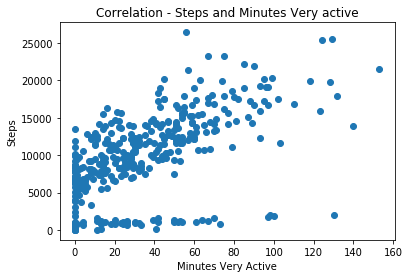

In [17]:
plt.scatter(x, y)
plt.title('Correlation - Steps and Minutes Very active')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [18]:
#There is some degree of correlation but not very strong
#maybe removing the many outliers when steps = 0 will make it a stronger relationship 

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [19]:
x = fitbit['Minutes Sedentary']
y = fitbit['Steps']

np.corrcoef(x, y)

array([[1.        , 0.07690608],
       [0.07690608, 1.        ]])

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

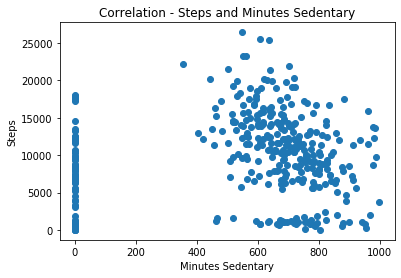

In [20]:
plt.scatter(x, y)
plt.title('Correlation - Steps and Minutes Sedentary')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

#these don't seem to be correlated at all 

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [21]:
x = fitbit['MinutesOfSleep']
y = fitbit['Steps']

np.corrcoef(x, y)

array([[1.        , 0.13098566],
       [0.13098566, 1.        ]])

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

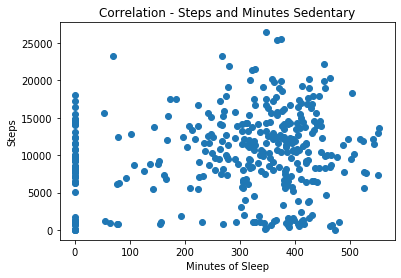

In [22]:
plt.scatter(x, y)
plt.title('Correlation - Steps and Minutes Sedentary')
plt.xlabel('Minutes of Sleep')
plt.ylabel('Steps')
plt.show()

#not correlated 

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [23]:
column= fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]

cor_fit =column.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [24]:
cor_fit['Steps'].sort_values(ascending = False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [25]:
time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

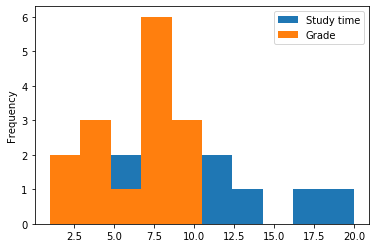

In [26]:
time_grades.plot(kind='hist')

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [27]:
from scipy import stats

x = time_grades['Study time']
y = time_grades['Grade']

#Pearson
print("Pearson correlation is", stats.pearsonr(x,y))

#Spearman
print("Spearman correlation is",stats.spearmanr(x,y))


"""
The output shows strong correlation between the two variables: the more study time, better chance of higher grade.

In particular, shows a stronger Spearman correlation vs Pearson, 
this might indicate that the data doesn't have a linear relatonship
"""

Pearson correlation is (0.7980456073578857, 0.0003627635256342742)
Spearman correlation is SpearmanrResult(correlation=0.819658753036942, pvalue=0.00018377469445788485)


"\nThe output shows strong correlation between the two variables: the more study time, \nbetter chance of higher grade.\n\nIn particular, shows a stronger Spearman correlation vs Pearson, this might indicate that \nthe data doesn't have a linear relatonship\n"

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

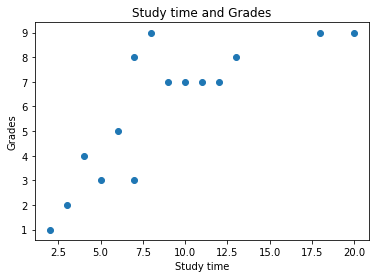

In [28]:
plt.scatter(x, y)
plt.title('Study time and Grades')
plt.xlabel('Study time')
plt.ylabel('Grades')
plt.show()

#i'd say these 2 variables have a non linear relationship
#maybe a negative exponential 

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [29]:
"""
While the Pearson correlation evaluates the linear relationship between the two variables,
the Spearman correlation evaluates the monotonic relationship (same direction)

The output showing Pearson<Spearman coefficient indicates that the variables are more likely 
to have a non linear relationship 

"""

'\nWhile the Pearson correlation evaluates the linear relationship between the two variables,\nthe Spearman correlation evaluates the monotonic relationship (same direction)\n\nThe output showing Pearson<Spearman coefficient indicates that the variables are more likely \nto have a non linear relationship \n\n'

In [30]:
def square(x,a,b,c):
    return a*(x**2)+b*x+c

In [31]:
from scipy.optimize import curve_fit

# the code below will try to fit the mathematical function defined as reciprocal, to the data points xdata, ydata
popt, pcov= curve_fit(square, x, y,  maxfev=10000)

No handles with labels found to put in legend.


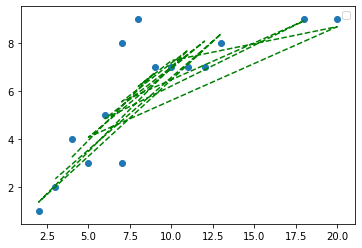

In [32]:
plt.plot(x, square(x, *popt),'g--')
plt.scatter(x, y)
plt.legend()
plt.show()

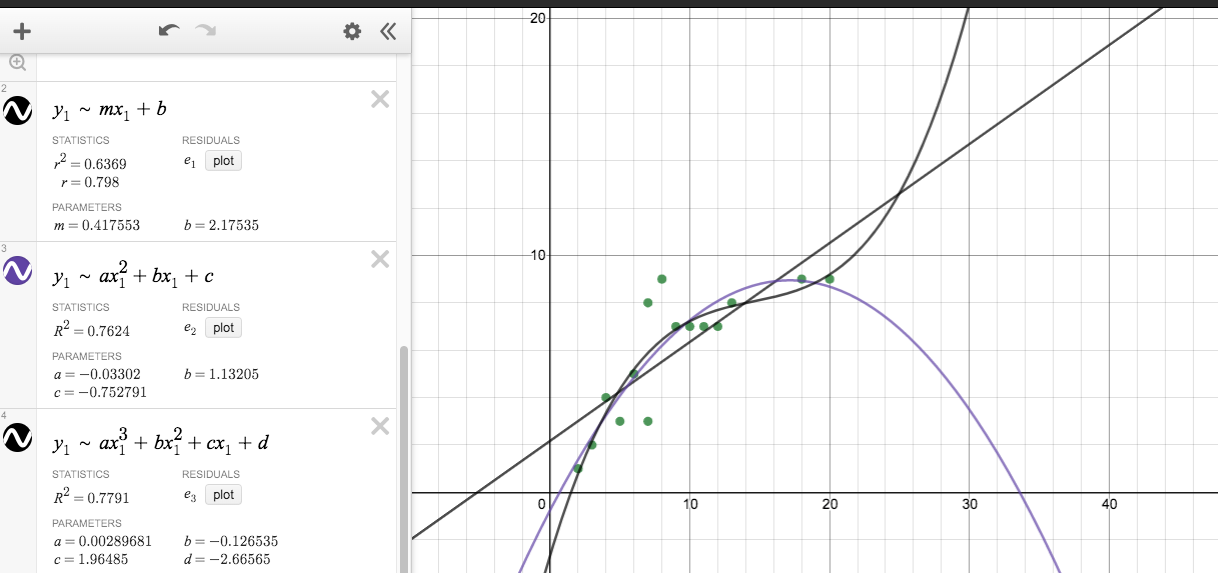

In [33]:
# GRACIAS SONIA 

from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(filename='/Users/ritasousabritopereira/Documents/ironhack/lab-pivot-table-and-correlation/desmos.png')